In [24]:
from typing import Tuple
import pickle

import keras.regularizers
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from experiments.util import load_data

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras import layers, activations, Sequential, losses

In [25]:
X_data, y_data = load_data()

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, random_state=42)

##### Preprocessing

In [27]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)

###### Simple 0-1 scaling

In [28]:
X_train_std = tf.image.per_image_standardization(X_train).numpy()
X_val_std = tf.image.per_image_standardization(X_val).numpy()

In [29]:
def plot_history(history):
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

#### NN (0 hidden layer -> Logistic Regression)

Epoch 1/40
293/293 [==============================] - 2s 6ms/step - loss: 1.9763 - accuracy: 0.3193 - val_loss: 1.8476 - val_accuracy: 0.3552

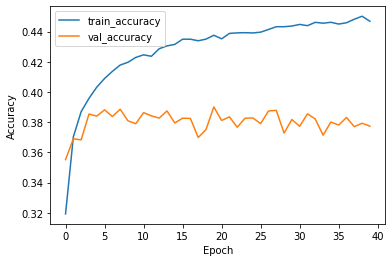

0.37736


In [33]:
model = Sequential([
    layers.InputLayer(input_shape=(32*32*3), name='input_layer'),
    layers.Dense(10, activation=activations.linear, name='output_layer'),
])
model.compile(
    optimizer='sgd',
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(X_train_std.reshape(-1, 32 * 32 * 3), y_train_enc, batch_size=128, epochs=40, validation_data=(X_val_std.reshape(-1, 32 * 32 * 3), y_val_enc))
plot_history(history)

y_val_hat_prob = model.predict(X_val_std.reshape(-1, 32 * 32 * 3))
y_val_hat = np.argmax(y_val_hat_prob, axis=1)

print(accuracy_score(y_val_hat, y_val_enc))

#### NN (1 hidden layer) no Regularization

Epoch 1/40
293/293 [==============================] - 4s 12ms/step - loss: 1.7866 - accuracy: 0.3681 - val_loss: 1.6254 - val_accuracy: 0.4293

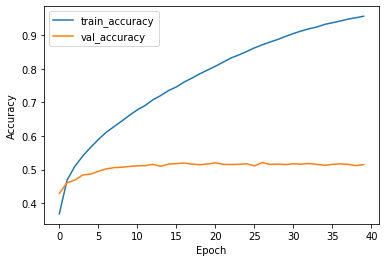

0.51488


In [30]:
model = Sequential([
    layers.InputLayer(input_shape=(32*32*3), name='input_layer'),
    layers.Dense(1024, activation=activations.relu, name='hidden_layer'),
    layers.Dense(10, activation=activations.linear, name='output_layer'),
])
model.compile(
    optimizer='sgd',
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(X_train_std.reshape(-1, 32 * 32 * 3), y_train_enc, batch_size=128, epochs=40, validation_data=(X_val_std.reshape(-1, 32 * 32 * 3), y_val_enc))
plot_history(history)

y_val_hat_prob = model.predict(X_val_std.reshape(-1, 32 * 32 * 3))
y_val_hat = np.argmax(y_val_hat_prob, axis=1)

print(accuracy_score(y_val_hat, y_val_enc))

#### NN (1 hidden layer) with L2 Regularization

Epoch 1/40
293/293 [==============================] - 7s 23ms/step - loss: 16.4681 - accuracy: 0.3695 - val_loss: 15.4556 - val_accuracy: 0.4213

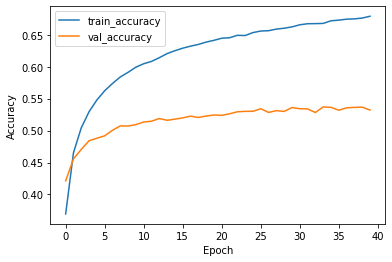

0.53208


In [31]:
model = Sequential([
    layers.InputLayer(input_shape=(32*32*3), name='input_layer'),
    layers.Dense(1024, activation=activations.relu, kernel_regularizer=keras.regularizers.l2(0.01), name='hidden_layer'),
    layers.Dense(10, activation=activations.linear, kernel_regularizer=keras.regularizers.l2(0.01), name='output_layer'),
])
model.compile(
    optimizer='sgd',
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(X_train_std.reshape(-1, 32 * 32 * 3), y_train_enc, batch_size=128, epochs=40, validation_data=(X_val_std.reshape(-1, 32 * 32 * 3), y_val_enc))
plot_history(history)

y_val_hat_prob = model.predict(X_val_std.reshape(-1, 32 * 32 * 3))
y_val_hat = np.argmax(y_val_hat_prob, axis=1)

print(accuracy_score(y_val_hat, y_val_enc))

#### NN (1 hidden layer) with Dropout Regularization

Epoch 1/40
293/293 [==============================] - 4s 14ms/step - loss: 2.1575 - accuracy: 0.2993 - val_loss: 1.6356 - val_accuracy: 0.4250

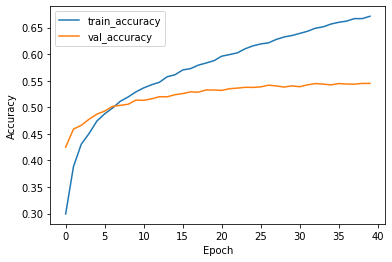

0.54488


In [32]:
model = Sequential([
    layers.InputLayer(input_shape=(32*32*3), name='input_layer'),
    layers.Dense(1024, activation=activations.relu, name='hidden_layer'),
    layers.Dropout(0.5),
    layers.Dense(10, activation=activations.linear, name='output_layer'),
])
model.compile(
    optimizer='sgd',
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(X_train_std.reshape(-1, 32 * 32 * 3), y_train_enc, batch_size=128, epochs=40, validation_data=(X_val_std.reshape(-1, 32 * 32 * 3), y_val_enc))
plot_history(history)

y_val_hat_prob = model.predict(X_val_std.reshape(-1, 32 * 32 * 3))
y_val_hat = np.argmax(y_val_hat_prob, axis=1)

print(accuracy_score(y_val_hat, y_val_enc))